## Clean And Analyze Employee Exit Surveys

In this project, I work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

## Aim of the project

This project provides answers to the following:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


## Data Dictionary

Below is a preview of a couple columns I'll work with from the `dete_survey.csv`:
* `ID`: An id used to identify the participant of the survey
* `SeparationType`: The reason why the person's employment ended
* `Cease Date`: The year or month the person's employment ended
* `DETE Start Date`: The year the person began employment with the DETE



Below is a preview of a couple columns I'll work with from the `tafe_survey.csv`:

* `Record ID`: An id used to identify the participant of the survey
* `Reason for ceasing employment`: The reason why the person's employment ended
* `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

## Introduction

In [226]:
# import pandas as pd
# import numpy as np
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)


dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [227]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [228]:

print(dete_survey.isnull().sum())


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [229]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [230]:

tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [231]:

print(tafe_survey.isnull().sum())


Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


The following were observed based on the exploration work above:

* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the `dete_survey` and `tafe_survey` contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## Working on Missing values and Unneccessary Columns

Missing Values were identified and unneccessary columns dropped.
First, the `Not Stated` values are corrected and some of the columns that are not needed for the anaysis are dropped

In [232]:
# Reading the data again make `Not Stated` a `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values= 'Not Stated')

# Exploring the dete_survey
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [233]:
# Drop unneccessary columns from `dete_survey`
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)

#Check that the columns were dropped
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [234]:
# Drop unneccessary columns from `dete_survey`
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

#Check that the columns were dropped
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

## Rename Columns

Since the two dataframes will be combined, there is a need to standardise their columns name.

In [235]:
# Clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Check that column names were updated correctly
print(dete_survey_updated.columns)
dete_survey_updated.head()

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [236]:
# Update column names to match the names in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check to enure columns names are updated correctly
print(tafe_survey_updated.columns)
tafe_survey_updated.head()

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filtering Resigned Respondents

Recall that our end goal is to answer about employees resignation.

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, I'll only analyze survey respondents who resigned, so their separation type contains the string `Resignation`.

In [237]:
# Confirm the unique values for the separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [238]:
# Confirm the unique values for the separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [239]:
# dete_survey_update has "Resignation" in three compound words seperated by "-". These words are combined into one word (Resignation)
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# confirm that the values has been updated successfully
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [240]:
# Since the interest of this project on resignation separation type, value with resignationsignation will be separate from other separation.
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

#confirming the shape for the two dataframe
print (dete_resignation.shape)
print (tafe_resignation.shape)

(311, 35)
(340, 23)


Dataframe.copy method was used to copy seperately the findings from the resignation type in the separationtype column. This is done to prevent SettingwithCopy warning. 

##  Data Verification

As a reminder, this project is interested among other things in the period of time an employee worked for the instition.

In this step, I'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense and are free from logical inconsistencies 

In [241]:
# Exploring for inconsistency check in the cease date column
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

From the exploration above, the column contains some irregularities with date. Hence, the need to clean up the column data.

In [242]:
# Years are extracted from the column and converted to float
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1]
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype('float')
dete_resignation['cease_date'].value_counts()


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [243]:
# Exploring for inconsistency check in the dete_start date column
dete_resignation['dete_start_date'].value_counts().sort_index(ascending = True)


1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

Analysed data shows that employees starts of employment ranges from 1963 to 2013

In [244]:
# Sort unique values
dete_resignation['cease_date'].value_counts().sort_index(ascending = True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [245]:
# Exploring for inconsistency check in the tafe_start date column
tafe_resignation['cease_date'].value_counts().sort_index(ascending = True)


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

TAFE resignation happens between year 2009 and 2013. Highest resignation was recorded in year 2011

## Ploting Boxplot

Boxplot is plotted to identify any values that look wrong.

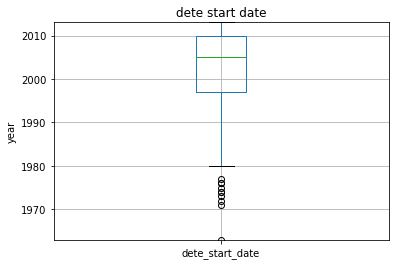

In [246]:
# Boxplot for dete start date on dete survey

ax = dete_resignation.boxplot(column = ['dete_start_date'])
plt.title("dete start date")
ax.set_ylim(1963,2013)
plt.ylabel("year")
plt.show()

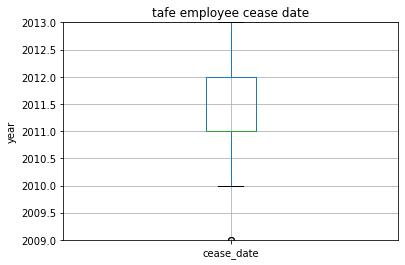

In [247]:
ax = tafe_resignation.boxplot(column=['cease_date'])
plt.title("tafe employee cease date")
ax.set_ylim(2009,2013)
plt.ylabel("year")
plt.show()

After careful look of the plot shown above, it seems there is no major issues with the values. 

## Create Service Year (institute_service) Column

`tafe_resignations` dataframe already contains a "service" column, which I renamed to institute_service. In order to analyze both surveys together, I'll have to create a corresponding `institute_service` column in `dete_resignations`.

In [248]:
# Calculate the service years (institute_service)
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

# confirm the result
dete_resignation['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identify Dissatisfied Employees

Some employees resigned because they were dissatisfied. Here are the columns that categorise employee as "dissatisfied" from the two dataframes:

**tafe_survey_updated:**
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

**dafe_survey_updated:**
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

An employee is marked as `dissatisfied` in a new column if any of the factors aboe caused them to resign. The values for the new column is shon below:

* **`True:`** indicates a person resigned because they were dissatisfied in some way
* **`False:`** indicates a person resigned because of a reason other than dissatisfaction with the job
* **`NaN:`** indicates the value is missing

In [249]:
# Confirm unique values
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [250]:
# Confirm unique values
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [251]:
# contributing factors columns is updated as to be either True, False, or NaN
def update_values (val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True
tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_values).any(1, skipna = False)
tafe_resignation_update = tafe_resignation.copy()

# veify unique values of dissatisfied columns after update
tafe_resignation_update['dissatisfied'].value_counts(dropna = False)






False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [252]:
# Columns related to dissatisfaction dete survey is updated as to be either True, False, or NaN
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)

dete_resignation_update = dete_resignation.copy()
dete_resignation_update['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

A column `institute` is added to each dataframe to allow us to easily distinguish between the two.

A column named `institute` is addede to dete_resignations_update. Each row should contain the value DETE.

A column named `institute` is added to tafe_resignations_update. Each row should contain the value TAFE.

In [253]:
# institute colum is added to both dataframe
dete_resignation_update['institute'] = 'DETE'
tafe_resignation_update['institute'] = 'TAFE'

In [254]:
# Combine the dataframes
combined = pd.concat([dete_resignation_update, tafe_resignation_update], ignore_index=True)

# Check the number of non null
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [255]:
# Columns with less than 500 non null values is dropped
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

## Clean the Service Column

The `institute_service` column needed to be cleaned. This column currently contains values in a couple different forms.

The column is modified according to career stage using the following definations:
* New: Less than 3 years in the workplace
* Experienced: 3-6 years in the workplace
* Established: 7-10 years in the workplace
* Veteran: 11 or more years in the workplace


In [256]:
# verify the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [257]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# verify the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [258]:
# Service year is converted to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Check for update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Employee Dissatisfaction Analysis

Missing values in the dissatisfied column is filled up with the most frequent value `False`. Then, the percentage of employees who resigned due to dissatisfaction in each service_cat group is calculated and the results ploted.

In [259]:
# Check the unique values
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [260]:
# Missing values is replaced with the most frequent value(False)
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [261]:
# Percentage of employees who resigned due to dissatisfaction in each service category is calculated
dissatisfaction_perc = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Check dissatisfaction percentage
dissatisfaction_perc

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


<function matplotlib.pyplot.show(*args, **kw)>

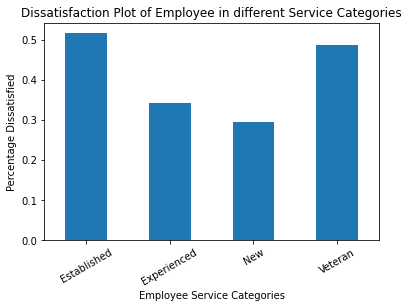

In [262]:
# Result is Plotted using bar chart
dissatisfaction_perc.plot(kind='bar', rot=30, legend = False, title='Dissatisfaction Plot of Employee in different Service Categories' )
plt.xlabel ('Employee Service Categories')
plt.ylabel ('Percentage Dissatisfied')
plt.show


New employees of about 29.5% resigned due to dissastifaction, while Established of about 7-10 years of experience has the highest resigning rate with about 51.6% while veterans with about 48% rate resigned and Experienced at about 34% resigned

## Analysiing Age of Dissastified Employee

In [263]:
# check age of employee
combined_updated['age']

0       36-40
1       41-45
2       31-35
3       46-50
4       31-35
        ...  
646    21  25
647     51-55
648       NaN
649     51-55
650    26  30
Name: age, Length: 651, dtype: object

In [264]:
# Check for unique values using value_counts
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The `age` column needed to be cleaned. From the age column, there are irregularities in the different rows, some contain "-" while others dont. i will be made uniform by converting those without "-" to contain "-", and i will replace 56 or older to 56-60. 


In [267]:
# Clean the age column
combined_updated['age_updated'] = combined_updated['age'].str.replace('  ', '-').str.replace('56 or older', '56-60').str.replace('61 or older', '61 or >').str.replace('20 or younger', '21 or <')

# Check for unique values
combined_updated['age_updated'].value_counts(dropna = False)

41-45      93
46-50      81
36-40      73
51-55      71
26-30      67
21-25      62
31-35      61
56-60      55
NaN        55
61 or >    23
21 or <    10
Name: age_updated, dtype: int64

The `age_updated` column used in analysing the dissastifaction rate of each service catgory

In [268]:
# Percentage of employees who resigned due to dissatisfaction in different age range is calculated
age_dissatisfaction_perc = combined_updated.pivot_table(index = 'age_updated', values = 'dissatisfied' )
age_dissatisfaction_perc

,dissatisfied
age_updated,
21 or <,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56-60,0.381818


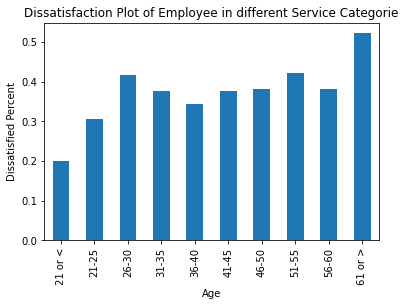

In [269]:
age_dissatisfaction_perc.plot(kind = 'bar', rot = 90, title = 'Dissatisfaction Plot of Employee in different Service Categorie', legend = False)
plt.xlabel('Age')
plt.ylabel('Dissatisfied Percent')
plt.show()

Employees 20 years younger are the least to resign at the rate of 20%, while those with more than 61 years of age resign the most at the rate of 52%

## DETE and TAFE Resignation Rate

In order to determine the institute with the highest resignation rate, the resignation rate of both institute will be compared.

In [272]:
# Check the data in each institute survey
combined_updated['institute'].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

TAFE seems to record more survey than DETE


<function matplotlib.pyplot.show(*args, **kw)>

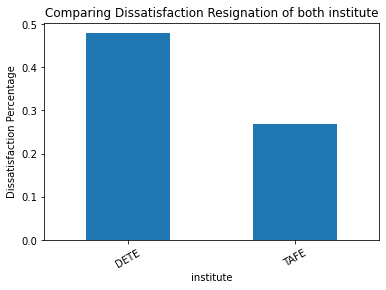

In [276]:
 # Check the effect on the resignation rate
institute_pivot_table = combined_updated.pivot_table(index= 'institute', values = 'dissatisfied')

# plot to comare the two institute
institute_pivot_table.plot(kind = 'bar', rot = 30, legend = False, title = 'Comparing Dissatisfaction Resignation of both institute')
plt.xlabel('institute')
plt.ylabel('Dissatisfaction Percentage')
plt.show

This plot shows that DETE has more resignation rate than TAFE. DETE has about 48% resignation rate while TAFE recorded about 28%.

In [280]:
# Check dissatisfaction of DETE and TAFE on different service categories.

institute_service_pivot = combined_updated.pivot_table(index = 'service_cat', columns = 'institute', values = 'dissatisfied')
institute_service_pivot

institute,DETE,TAFE
service_cat,,
Established,0.609756,0.333333
Experienced,0.460526,0.250000
New,0.375000,0.262774
Veteran,0.560000,0.277778


<function matplotlib.pyplot.show(*args, **kw)>

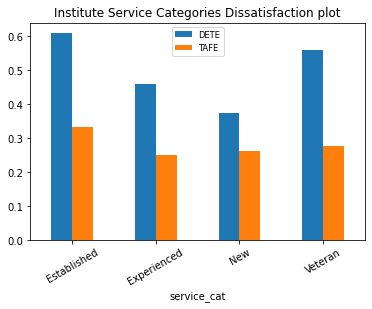

In [290]:
institute_service_pivot.plot(kind = 'bar', rot = 30, title = 'Institute Service Categories Dissatisfaction plot')
plt.xlabel = 'Service Categories'
plt.ylabel = 'Dissatisfied Percentage'
plt.legend(loc='upper center', fontsize='small')
plt.show

from the plot shown above, DETE institute had the highest resigning rate from the dete survey data. DETE had about 60% resignations due to dissatisfaction on the `Established` service category. This is followed by the `Veteran`. 

In TAFE, it seems that resignation is relatively constant across the levels but, `Established` had the highest resigning rate.

## Conclusion 

Analysis of exit surveys from employees of the Department of Education , Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia was carried out in order to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

From the analysis carried out and result presented in above, it has been found that younger employees with fewer years of experience are less likely to resign due to some sort of dissatisfaction than older employees with long years of experience.
